#### Retail Sales

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('./data/us_retail_sales.csv', parse_dates=['sales_month'])
df[:5]

,sales_month,naics_code,kind_of_business,reason_for_null,sales
0,1992-01-01,441,Motor vehicle and parts dealers,NaN,29811.0
1,1992-01-01,4411,Automobile dealers,NaN,25800.0
2,1992-01-01,"4411, 4412",Automobile and other motor vehicle dealers,NaN,26788.0
3,1992-01-01,44111,New car dealers,NaN,24056.0
4,1992-01-01,44112,Used car dealers,NaN,1744.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22620 entries, 0 to 22619
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   sales_month       22620 non-null  datetime64[ns]
 1   naics_code        20184 non-null  object        
 2   kind_of_business  22620 non-null  object        
 3   reason_for_null   594 non-null    object        
 4   sales             22026 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 883.7+ KB


In [4]:
df.shape

(22620, 5)

In [5]:
df1 = df[['sales_month', 'kind_of_business', 'sales']].copy()
df1['sales_year'] = df1['sales_month'].dt.year
df2 = df1[['sales_year', 'kind_of_business', 'sales']].copy()
df2[:5]

,sales_year,kind_of_business,sales
0,1992,Motor vehicle and parts dealers,29811.0
1,1992,Automobile dealers,25800.0
2,1992,Automobile and other motor vehicle dealers,26788.0
3,1992,New car dealers,24056.0
4,1992,Used car dealers,1744.0


In [6]:
df2.set_index('sales_year', inplace=True)
df2[:5]

,kind_of_business,sales
sales_year,,
1992,Motor vehicle and parts dealers,29811.0
1992,Automobile dealers,25800.0
1992,Automobile and other motor vehicle dealers,26788.0
1992,New car dealers,24056.0
1992,Used car dealers,1744.0


In [7]:
df.set_index('sales_month', inplace=True)
df[:5]

,naics_code,kind_of_business,reason_for_null,sales
sales_month,,,,
1992-01-01,441,Motor vehicle and parts dealers,NaN,29811.0
1992-01-01,4411,Automobile dealers,NaN,25800.0
1992-01-01,"4411, 4412",Automobile and other motor vehicle dealers,NaN,26788.0
1992-01-01,44111,New car dealers,NaN,24056.0
1992-01-01,44112,Used car dealers,NaN,1744.0


In [8]:
df.index

DatetimeIndex(['1992-01-01', '1992-01-01', '1992-01-01', '1992-01-01',
               '1992-01-01', '1992-01-01', '1992-01-01', '1992-01-01',
               '1992-01-01', '1992-01-01',
               ...
               '2020-12-01', '2020-12-01', '2020-12-01', '2020-12-01',
               '2020-12-01', '2020-12-01', '2020-12-01', '2020-12-01',
               '2020-12-01', '2020-12-01'],
              dtype='datetime64[ns]', name='sales_month', length=22620, freq=None)

In [9]:
df.sort_index(inplace=True)
df[:5]

,naics_code,kind_of_business,reason_for_null,sales
sales_month,,,,
1992-01-01,441,Motor vehicle and parts dealers,NaN,29811.0
1992-01-01,4411,Automobile dealers,NaN,25800.0
1992-01-01,"4411, 4412",Automobile and other motor vehicle dealers,NaN,26788.0
1992-01-01,44111,New car dealers,NaN,24056.0
1992-01-01,44112,Used car dealers,NaN,1744.0


In [10]:
df2.sort_index(inplace=True)
df2[:5]

,kind_of_business,sales
sales_year,,
1992,Motor vehicle and parts dealers,29811.0
1992,Automobile dealers,25800.0
1992,Automobile and other motor vehicle dealers,26788.0
1992,New car dealers,24056.0
1992,Used car dealers,1744.0


In [11]:
df2.tail()

,kind_of_business,sales
sales_year,,
2020,GAFO(1),144871.0
2020,Retail sales and food services excl motor vehi...,494937.0
2020,"Retail and food services sales, total",611429.0
2020,Retail sales and food services excl gasoline s...,574794.0
2020,Retail sales and food services excl motor vehi...,458302.0


In [12]:
df2.index

Index([1992, 1992, 1992, 1992, 1992, 1992, 1992, 1992, 1992, 1992,
       ...
       2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020],
      dtype='int32', name='sales_year', length=22620)

In [81]:
monthly_food_sales = (df[df['kind_of_business']=='Retail and food services sales, total']
 .reset_index()
 .loc[:, ['sales_month', 'kind_of_business', 'sales']]
 .sort_values('sales_month')
)
monthly_food_sales.head()

,sales_month,kind_of_business,sales
0,1992-01-01,"Retail and food services sales, total",146376.0
1,1992-02-01,"Retail and food services sales, total",147079.0
2,1992-03-01,"Retail and food services sales, total",159336.0
3,1992-04-01,"Retail and food services sales, total",163669.0
4,1992-05-01,"Retail and food services sales, total",170068.0


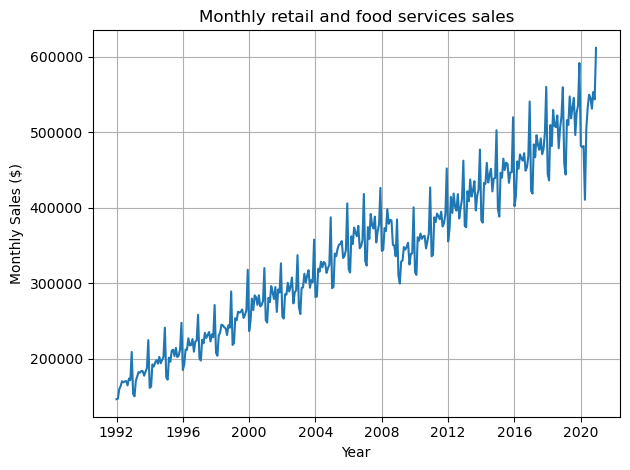

In [82]:
plt.figsize=(12,6)
sns.lineplot(data=monthly_food_sales, x='sales_month', y='sales')
plt.title('Monthly retail and food services sales')
plt.xlabel('Year')
plt.ylabel('Monthly Sales ($)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [14]:
df2.groupby(['sales_year'])['sales'].sum().head()

sales_year
1992    15710631.0
1993    16784256.0
1994    18146735.0
1995    19070293.0
1996    20228853.0
Name: sales, dtype: float64

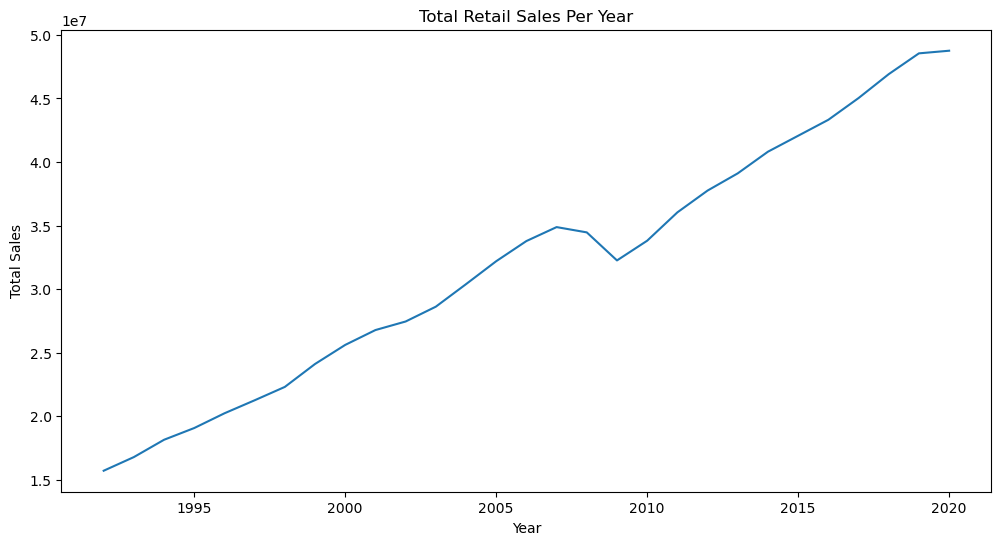

In [17]:
df2.groupby(['sales_year'])['sales'].sum().plot(figsize=(12,6), title='Total Retail Sales Per Year')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.show()

In [ ]:
df2_yearly = (
    df2[df2['kind_of_business']=='Retail and food services sales, total']
    .groupby(['sales_year'])['sales']
    .sum()
    .reset_index(name='yearly_sales')
    )
df2_yearly.head()

,sales_year,yearly_sales
0,1992,2014102.0
1,1993,2153095.0
2,1994,2330235.0
3,1995,2450628.0
4,1996,2603794.0


In [31]:
df_yearly = (
    df2[df2['kind_of_business'] == 'Retail and food services sales, total']
    .groupby('sales_year')['sales']
    .sum()
    .reset_index()
)

df_yearly.head()


,sales_year,sales
0,1992,2014102.0
1,1993,2153095.0
2,1994,2330235.0
3,1995,2450628.0
4,1996,2603794.0


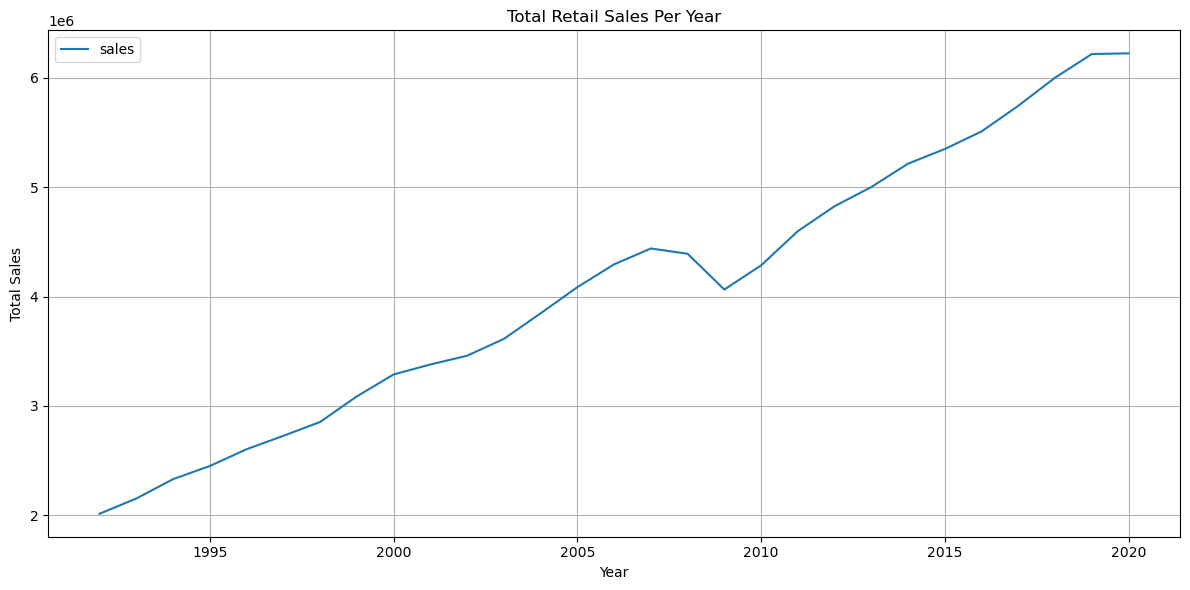

In [35]:
df_yearly.plot(x='sales_year', y='sales', figsize=(12,6), title='Total Retail Sales Per Year')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.grid(True)
plt.tight_layout()
plt.show()

In [38]:
df2.head()

,kind_of_business,sales
sales_year,,
1992,Motor vehicle and parts dealers,29811.0
1992,Automobile dealers,25800.0
1992,Automobile and other motor vehicle dealers,26788.0
1992,New car dealers,24056.0
1992,Used car dealers,1744.0


In [61]:
df_leisure = (df2[df2['kind_of_business'].isin(['Book stores', 'Sporting goods stores', 'Hobby, toy, and game stores'])]
              .groupby(['sales_year', 'kind_of_business'])['sales']
              .sum()
              .reset_index(name='yearly_sales')
              .sort_values('sales_year'))

In [62]:
df_leisure.head()

,sales_year,kind_of_business,yearly_sales
0,1992,Book stores,8327.0
1,1992,"Hobby, toy, and game stores",11251.0
2,1992,Sporting goods stores,15583.0
3,1993,Book stores,9108.0
4,1993,"Hobby, toy, and game stores",11651.0


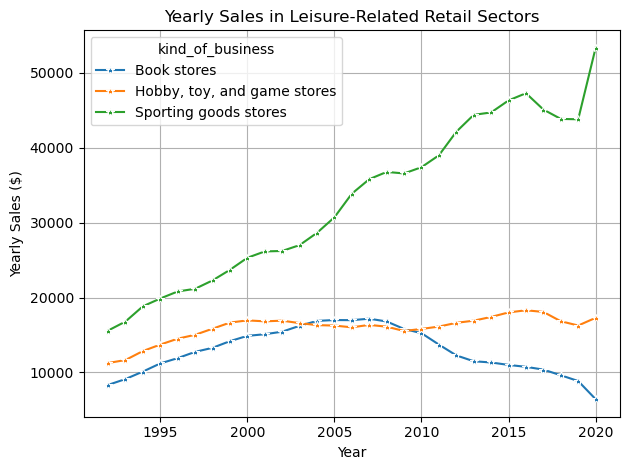

In [51]:
plt.figsize=(10,5)
sns.lineplot(data=df_leisure, x='sales_year', y='yearly_sales', hue='kind_of_business', marker='*')
plt.title('Yearly Sales in Leisure-Related Retail Sectors')
plt.xlabel('Year')
plt.ylabel('Yearly Sales ($)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [72]:
monthly_sales_men_and_women = (df[df['kind_of_business'].isin(['Men\'s clothing stores', 'Women\'s clothing stores'])]
                               .reset_index()
                               .loc[:, ['sales_month', 'kind_of_business', 'sales']]
                               .sort_values(['sales_month', 'sales']))

monthly_sales_men_and_women.head()

,sales_month,kind_of_business,sales
0,1992-01-01,Men's clothing stores,701.0
1,1992-01-01,Women's clothing stores,1873.0
2,1992-02-01,Men's clothing stores,658.0
3,1992-02-01,Women's clothing stores,1991.0
4,1992-03-01,Men's clothing stores,731.0


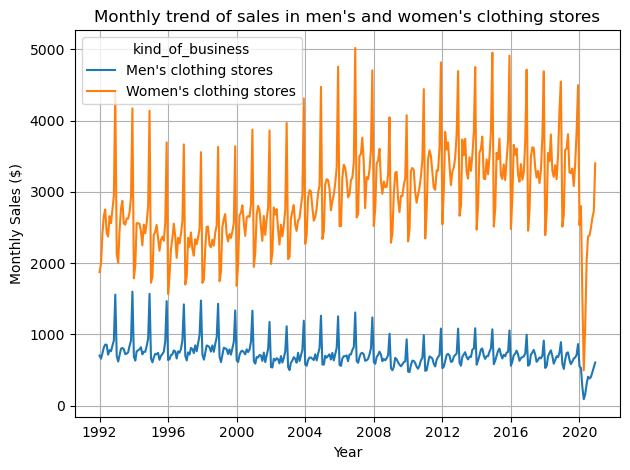

In [74]:
plt.figsize=(12,6)
sns.lineplot(data=monthly_sales_men_and_women, x='sales_month', y='sales', hue='kind_of_business')
plt.title('Monthly trend of sales in men\'s and women\'s clothing stores')
plt.xlabel('Year')
plt.ylabel('Monthly Sales ($)')
plt.grid(True)
plt.tight_layout()
plt.show()


In [67]:
yearly_sales_men_and_women = (df2[df2['kind_of_business'].isin(['Men\'s clothing stores', 'Women\'s clothing stores'])]
                .groupby(['sales_year', 'kind_of_business'])['sales']
                .sum()
                .reset_index(name='yearly_sales')
                .sort_values('sales_year'))

In [68]:
yearly_sales_men_and_women.head()

,sales_year,kind_of_business,yearly_sales
0,1992,Men's clothing stores,10179.0
1,1992,Women's clothing stores,31815.0
2,1993,Men's clothing stores,9962.0
3,1993,Women's clothing stores,32350.0
4,1994,Men's clothing stores,10032.0


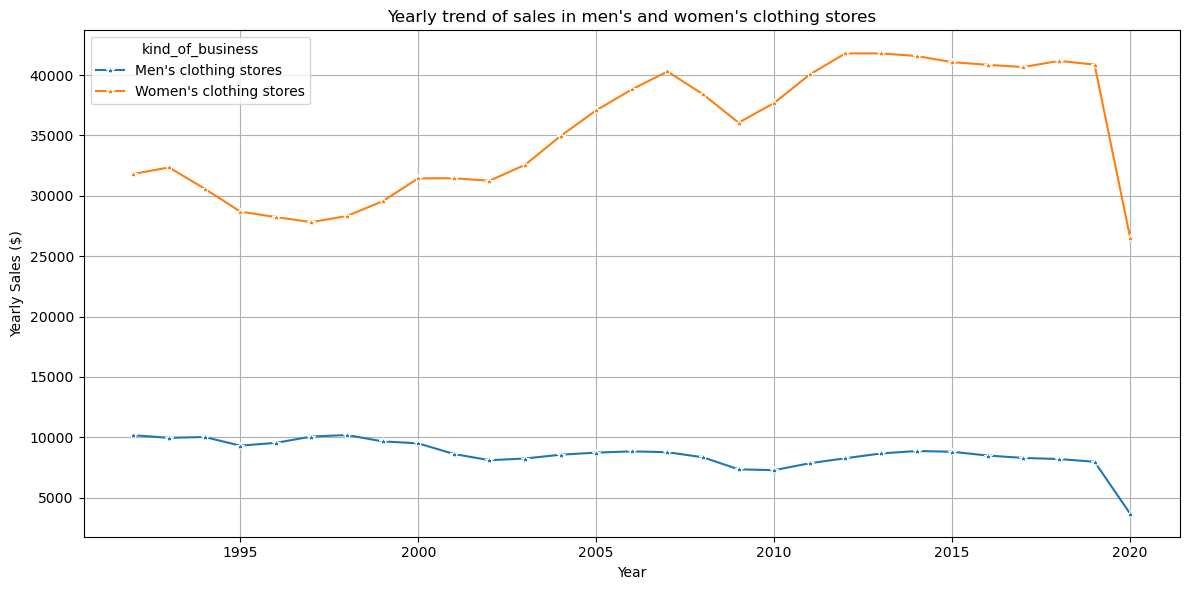

In [69]:
plt.figure(figsize=(12,6))
sns.lineplot(data=yearly_sales_men_and_women, x='sales_year', y='yearly_sales', hue='kind_of_business', marker='*')
plt.title('Yearly trend of sales in men\'s and women\'s clothing stores')
plt.xlabel('Year')
plt.ylabel('Yearly Sales ($)')
plt.grid(True)
plt.tight_layout()
plt.show()
